In [19]:
import pandas as pd
import os
import time
from glob import glob
from collections import defaultdict
from tqdm import tqdm
from itertools import combinations


In [20]:
# 配置常量
PAYMENT_STATUSES = ['已退款', '部分退款']
MIN_SUPPORT = 0.005
MIN_CONFIDENCE = 0.4


In [21]:
# 商品类
CATEGORIES = [
    '智能手机', '笔记本电脑', '平板电脑', '智能手表', '耳机', '音响', '相机', '摄像机', '游戏机',
    '上衣', '裤子', '裙子', '内衣', '鞋子', '帽子', '手套', '围巾', '外套',
    '零食', '饮料', '调味品', '米面', '水产', '肉类', '蛋奶', '水果', '蔬菜',
    '家具', '床上用品', '厨具', '卫浴用品',
    '文具', '办公用品',
    '健身器材', '户外装备',
    '玩具', '模型', '益智玩具',
    '婴儿用品', '儿童课外读物',
    '车载电子', '汽车装饰'
]

In [22]:
# 统计变量
refund_combos_counts = defaultdict(int)
all_combos_counts = defaultdict(int)
refund_rows = 0
total_rows = 0


In [23]:
# 获取文件列表
files = glob("./30G_data_new_partial/*.parquet")
# files = glob("./*.parquet")
print(f"找到 {len(files)} 个文件: {files}")


找到 16 个文件: ['./30G_data_new_partial/part-00008.parquet', './30G_data_new_partial/part-00013.parquet', './30G_data_new_partial/part-00002.parquet', './30G_data_new_partial/part-00015.parquet', './30G_data_new_partial/part-00010.parquet', './30G_data_new_partial/part-00006.parquet', './30G_data_new_partial/part-00014.parquet', './30G_data_new_partial/part-00011.parquet', './30G_data_new_partial/part-00004.parquet', './30G_data_new_partial/part-00012.parquet', './30G_data_new_partial/part-00009.parquet', './30G_data_new_partial/part-00000.parquet', './30G_data_new_partial/part-00003.parquet', './30G_data_new_partial/part-00001.parquet', './30G_data_new_partial/part-00007.parquet', './30G_data_new_partial/part-00005.parquet']


In [24]:
# ========== 文件遍历 ==========
start_total = time.time()
for file in files:
    print(f"\n\n处理文件: {os.path.basename(file)}")
    t0 = time.time()

    df = pd.read_parquet(file)
    t1 = time.time()
    print(f"读取文件用时: {t1 - t0:.2f} 秒")

    count_file_rows = 0
    count_file_refunds = 0

    for _, row in tqdm(df.iterrows(), total=len(df)):
        cats = [c for c in row['categories'] if c in CATEGORIES]
        if len(cats) < 2:
            continue  # 需要至少两个商品类别才能形成组合

        cat_combos = list(combinations(sorted(set(cats)), 2))  # 只做2元组组合

        for combo in cat_combos:
            all_combos_counts[combo] += 1

        total_rows += 1
        count_file_rows += 1

        if row['payment_status'] in PAYMENT_STATUSES:
            for combo in cat_combos:
                refund_combos_counts[combo] += 1
            refund_rows += 1
            count_file_refunds += 1

    t2 = time.time()
    print(f"总行数: {count_file_rows}, 退款行数: {count_file_refunds}, 用时: {t2 - t1:.2f} 秒")




处理文件: part-00008.parquet
读取文件用时: 4.84 秒


100%|██████████| 8437500/8437500 [08:20<00:00, 16871.26it/s]


总行数: 6750945, 退款行数: 4500296, 用时: 500.11 秒


处理文件: part-00013.parquet
读取文件用时: 5.04 秒


100%|██████████| 8437500/8437500 [08:13<00:00, 17090.82it/s]


总行数: 6750683, 退款行数: 4499980, 用时: 493.69 秒


处理文件: part-00002.parquet
读取文件用时: 5.12 秒


100%|██████████| 8437500/8437500 [08:23<00:00, 16742.23it/s]


总行数: 6748032, 退款行数: 4497831, 用时: 503.97 秒


处理文件: part-00015.parquet
读取文件用时: 4.78 秒


100%|██████████| 8437500/8437500 [08:34<00:00, 16399.17it/s]


总行数: 6747863, 退款行数: 4499937, 用时: 514.51 秒


处理文件: part-00010.parquet
读取文件用时: 5.21 秒


100%|██████████| 8437500/8437500 [08:21<00:00, 16827.66it/s]


总行数: 6750228, 退款行数: 4499893, 用时: 501.41 秒


处理文件: part-00006.parquet
读取文件用时: 5.23 秒


100%|██████████| 8437500/8437500 [08:30<00:00, 16534.39it/s]


总行数: 6747891, 退款行数: 4499377, 用时: 510.31 秒


处理文件: part-00014.parquet
读取文件用时: 5.25 秒


100%|██████████| 8437500/8437500 [08:26<00:00, 16670.38it/s]


总行数: 6750987, 退款行数: 4501837, 用时: 506.14 秒


处理文件: part-00011.parquet
读取文件用时: 5.27 秒


100%|██████████| 8437500/8437500 [08:32<00:00, 16462.13it/s]


总行数: 6751399, 退款行数: 4501985, 用时: 512.54 秒


处理文件: part-00004.parquet
读取文件用时: 4.92 秒


100%|██████████| 8437500/8437500 [08:34<00:00, 16384.38it/s]


总行数: 6750527, 退款行数: 4499007, 用时: 514.97 秒


处理文件: part-00012.parquet
读取文件用时: 5.31 秒


100%|██████████| 8437500/8437500 [08:33<00:00, 16421.20it/s]


总行数: 6750385, 退款行数: 4498511, 用时: 513.82 秒


处理文件: part-00009.parquet
读取文件用时: 5.13 秒


100%|██████████| 8437500/8437500 [08:25<00:00, 16706.78it/s]


总行数: 6748759, 退款行数: 4499465, 用时: 505.04 秒


处理文件: part-00000.parquet
读取文件用时: 5.14 秒


100%|██████████| 8437500/8437500 [08:24<00:00, 16712.80it/s]


总行数: 6751125, 退款行数: 4499803, 用时: 504.86 秒


处理文件: part-00003.parquet
读取文件用时: 4.93 秒


100%|██████████| 8437500/8437500 [08:19<00:00, 16901.14it/s]


总行数: 6749561, 退款行数: 4499166, 用时: 499.23 秒


处理文件: part-00001.parquet
读取文件用时: 5.12 秒


100%|██████████| 8437500/8437500 [08:23<00:00, 16751.96it/s]


总行数: 6750864, 退款行数: 4500548, 用时: 503.67 秒


处理文件: part-00007.parquet
读取文件用时: 5.07 秒


100%|██████████| 8437500/8437500 [08:17<00:00, 16954.65it/s]


总行数: 6749150, 退款行数: 4498860, 用时: 497.65 秒


处理文件: part-00005.parquet
读取文件用时: 5.06 秒


100%|██████████| 8437500/8437500 [08:25<00:00, 16684.99it/s]

总行数: 6749114, 退款行数: 4501302, 用时: 505.70 秒


In [25]:
print(f"\n所有文件处理完成，总交易数: {total_rows}, 退款交易数: {refund_rows}")
print(refund_combos_counts)


所有文件处理完成，总交易数: 107997513, 退款交易数: 71997798
defaultdict(<class 'int'>, {('智能手机', '笔记本电脑'): 415240, ('智能手机', '零食'): 424575, ('笔记本电脑', '零食'): 409918, ('儿童课外读物', '婴儿用品'): 390817, ('儿童课外读物', '智能手机'): 411482, ('儿童课外读物', '模型'): 429369, ('儿童课外读物', '玩具'): 378046, ('婴儿用品', '智能手机'): 407646, ('婴儿用品', '模型'): 425001, ('婴儿用品', '玩具'): 372729, ('智能手机', '模型'): 446569, ('智能手机', '玩具'): 393533, ('模型', '玩具'): 409594, ('婴儿用品', '平板电脑'): 385251, ('婴儿用品', '文具'): 420783, ('婴儿用品', '益智玩具'): 395334, ('婴儿用品', '蛋奶'): 373756, ('平板电脑', '文具'): 418610, ('平板电脑', '益智玩具'): 394772, ('平板电脑', '蛋奶'): 371545, ('文具', '益智玩具'): 431191, ('文具', '蛋奶'): 408141, ('益智玩具', '蛋奶'): 384054, ('帽子', '床上用品'): 372677, ('帽子', '米面'): 376791, ('床上用品', '米面'): 367173, ('围巾', '婴儿用品'): 422407, ('围巾', '蔬菜'): 412580, ('婴儿用品', '蔬菜'): 377274, ('办公用品', '汽车装饰'): 353228, ('内衣', '相机'): 389119, ('上衣', '模型'): 405813, ('上衣', '益智玩具'): 378482, ('上衣', '肉类'): 367522, ('模型', '益智玩具'): 435256, ('模型', '肉类'): 422795, ('益智玩具', '肉类'): 394364, ('婴儿用品', '水产'): 366284, ('婴儿用品'

In [26]:
# ==== 指标计算 ====
print("\n开始计算退款关联规则指标...")
start_calc = time.time()
results = []



开始计算退款关联规则指标...


In [27]:
for combo, refund_count in refund_combos_counts.items():
    total_count = all_combos_counts.get(combo, 0)
    if total_count == 0:
        continue

    support = refund_count / total_rows
    confidence = refund_count / refund_rows
    lift = confidence / (total_count / total_rows)

    # if support >= MIN_SUPPORT and confidence >= MIN_CONFIDENCE:
    results.append({
        "商品组合": " & ".join(combo),
        "退款次数": refund_count,
        "出现总次数": total_count,
        "支持度": round(support, 5),
        "置信度": round(confidence, 5),
        "提升度": round(lift, 3)
    })


In [28]:
end_calc = time.time()
print(f"指标计算完成，用时: {end_calc - start_calc:.2f} 秒")


指标计算完成，用时: 0.02 秒


In [29]:
print(results)

[{'商品组合': '智能手机 & 笔记本电脑', '退款次数': 415240, '出现总次数': 623028, '支持度': 0.00384, '置信度': 0.00577, '提升度': 1.0}, {'商品组合': '智能手机 & 零食', '退款次数': 424575, '出现总次数': 636658, '支持度': 0.00393, '置信度': 0.0059, '提升度': 1.0}, {'商品组合': '笔记本电脑 & 零食', '退款次数': 409918, '出现总次数': 615423, '支持度': 0.0038, '置信度': 0.00569, '提升度': 0.999}, {'商品组合': '儿童课外读物 & 婴儿用品', '退款次数': 390817, '出现总次数': 586860, '支持度': 0.00362, '置信度': 0.00543, '提升度': 0.999}, {'商品组合': '儿童课外读物 & 智能手机', '退款次数': 411482, '出现总次数': 617647, '支持度': 0.00381, '置信度': 0.00572, '提升度': 0.999}, {'商品组合': '儿童课外读物 & 模型', '退款次数': 429369, '出现总次数': 644028, '支持度': 0.00398, '置信度': 0.00596, '提升度': 1.0}, {'商品组合': '儿童课外读物 & 玩具', '退款次数': 378046, '出现总次数': 567131, '支持度': 0.0035, '置信度': 0.00525, '提升度': 1.0}, {'商品组合': '婴儿用品 & 智能手机', '退款次数': 407646, '出现总次数': 611074, '支持度': 0.00377, '置信度': 0.00566, '提升度': 1.001}, {'商品组合': '婴儿用品 & 模型', '退款次数': 425001, '出现总次数': 636650, '支持度': 0.00394, '置信度': 0.0059, '提升度': 1.001}, {'商品组合': '婴儿用品 & 玩具', '退款次数': 372729, '出现总次数': 560040, '支持度': 0.00345, '置信度

In [30]:
# 保存结果
df_refund_rules = pd.DataFrame(results)
df_refund_rules = df_refund_rules.sort_values(by="置信度", ascending=False)
df_refund_rules.to_csv("退款商品组合_关联规则.csv", index=False, encoding='utf-8-sig')

print(f"\n结果保存为 '退款商品组合_关联规则.csv'")
print(f"总耗时: {time.time() - start_total:.2f} 秒")



结果保存为 '退款商品组合_关联规则.csv'
总耗时: 8169.12 秒


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 设置中文字体（防止中文乱码）
plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
plt.rcParams['axes.unicode_minus'] = False


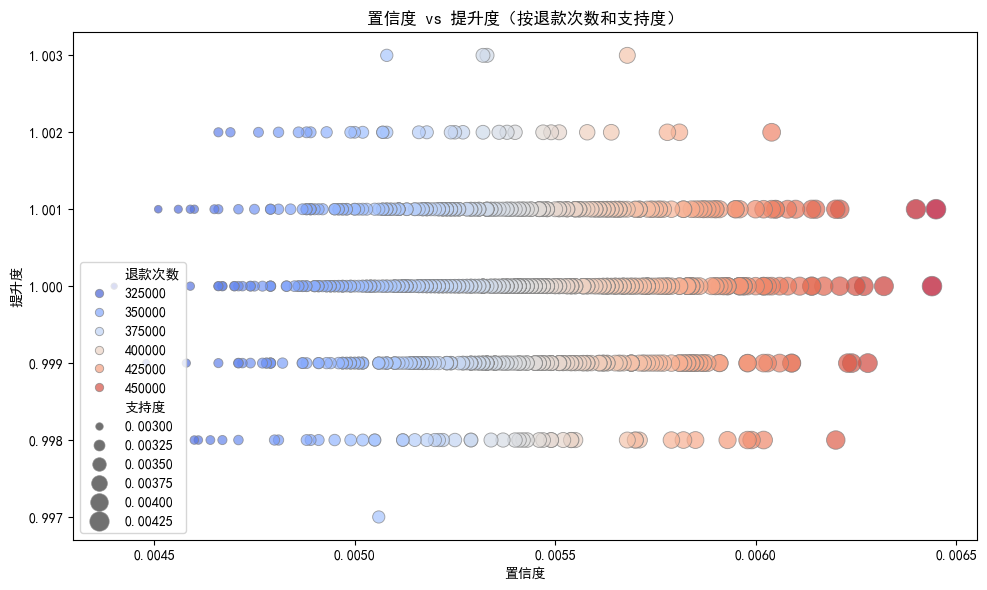

C:\Users\Highee\AppData\Local\Temp\ipykernel_9492\3320677370.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_lift, x='提升度', y='商品组合', palette='viridis')


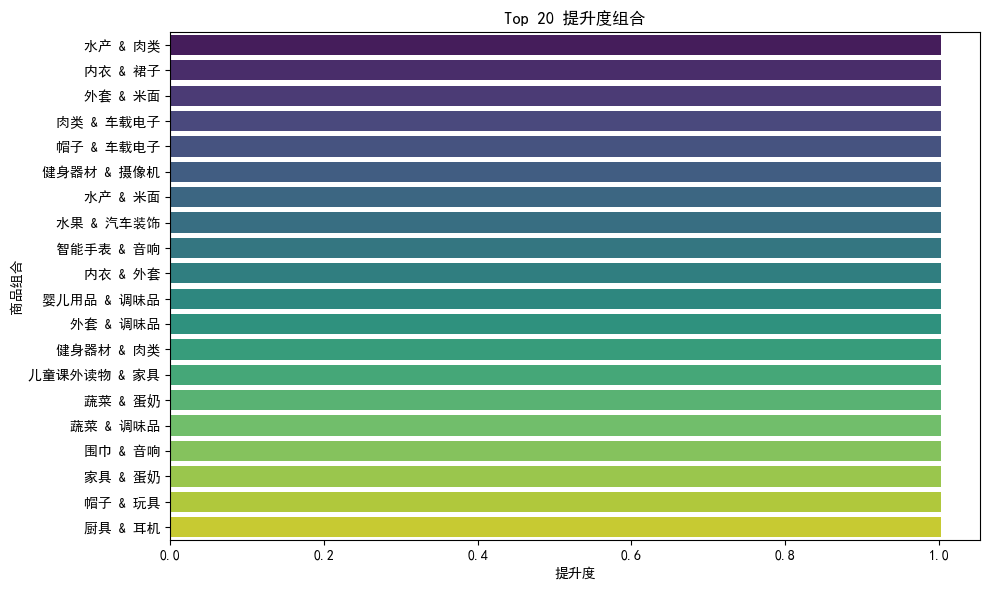

C:\Users\Highee\AppData\Local\Temp\ipykernel_9492\3320677370.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_support, x='支持度', y='商品组合', palette='crest')


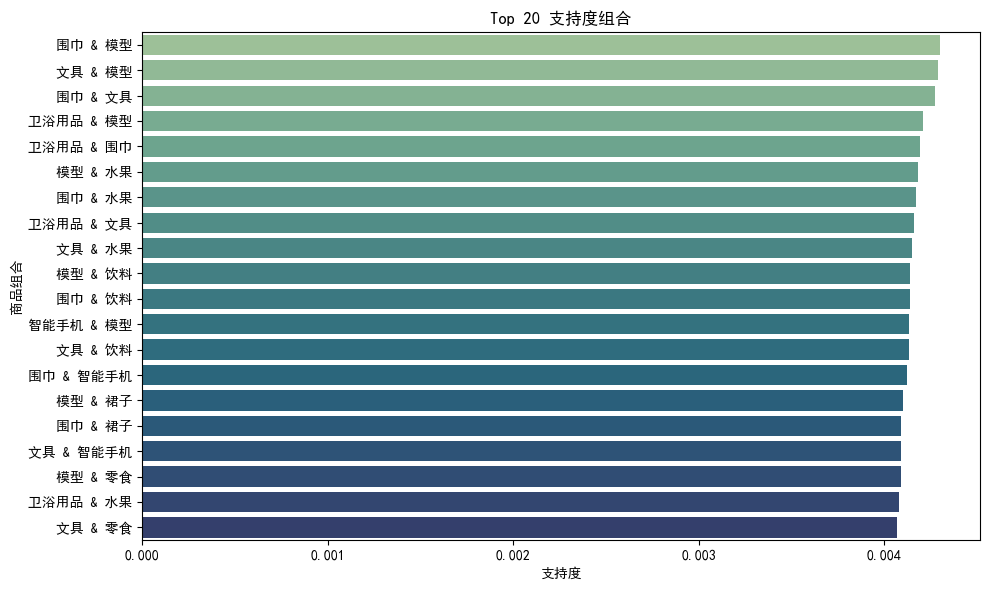

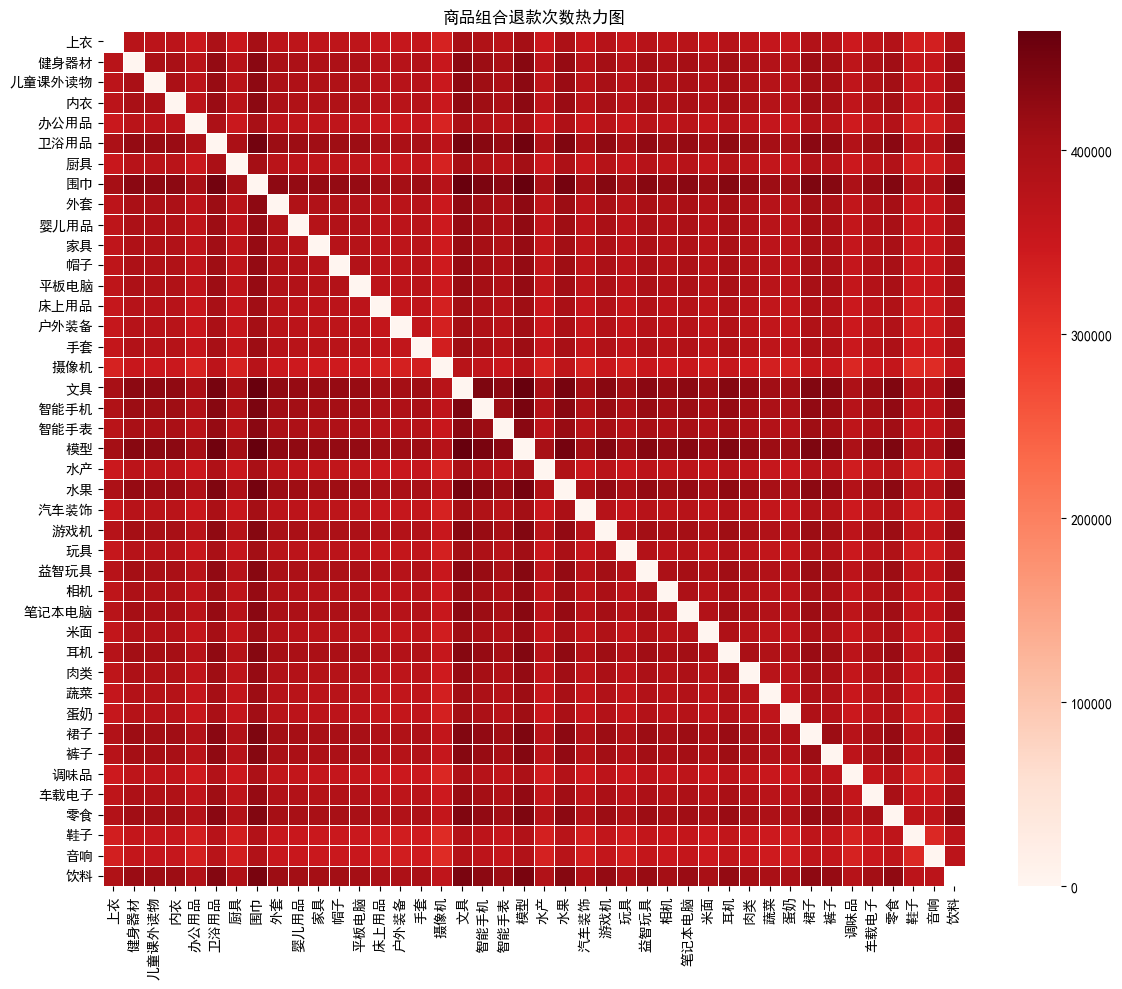

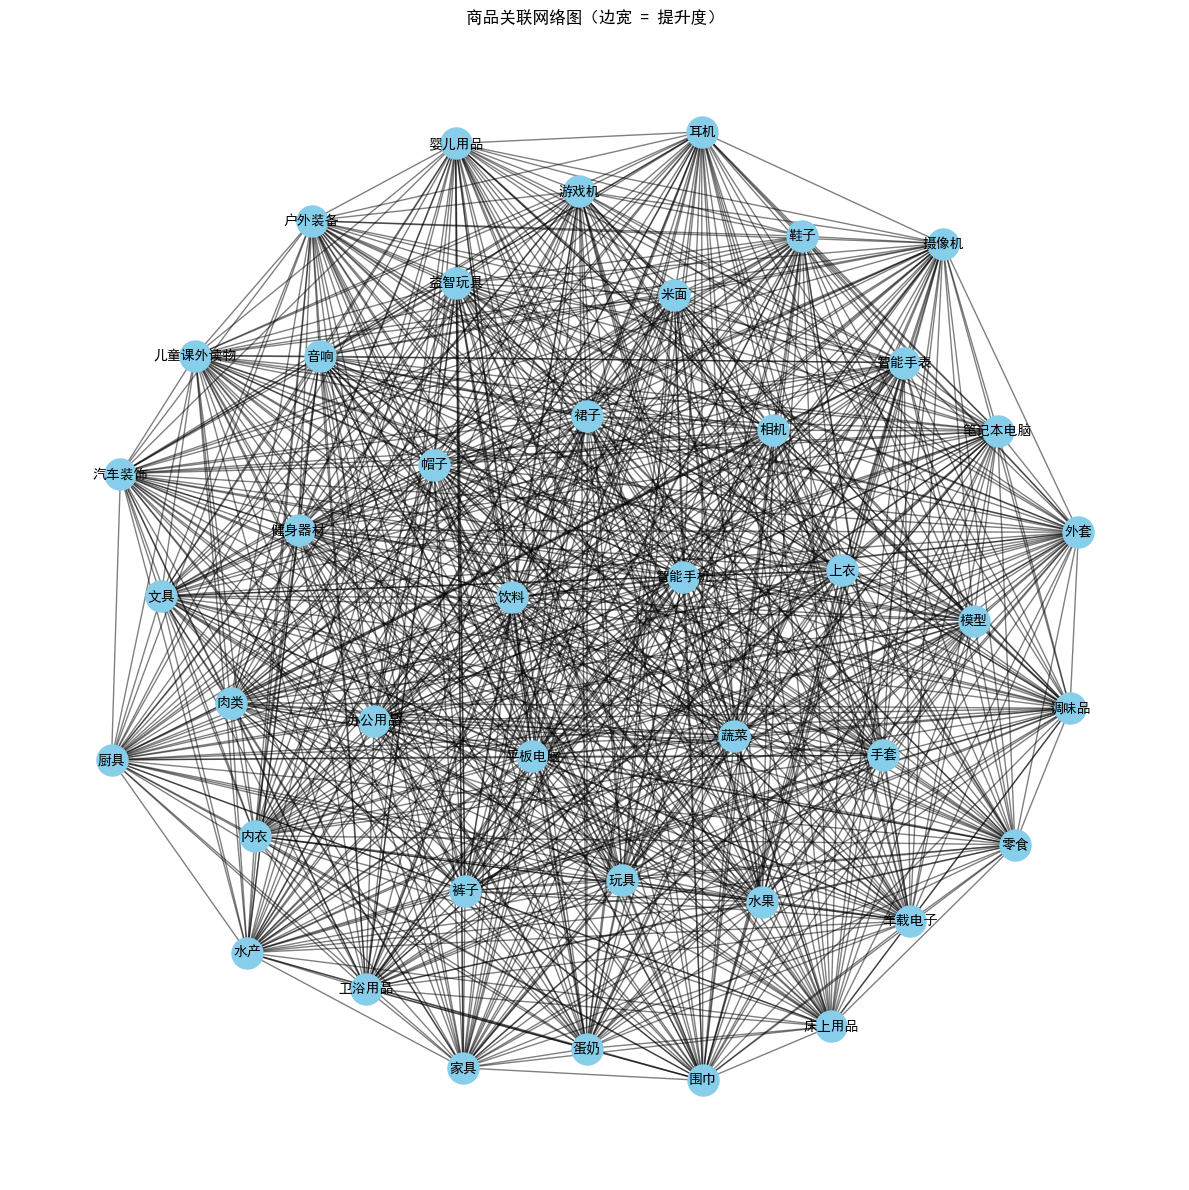

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from itertools import combinations

# 设置中文字体（如使用中文操作系统）
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 读取数据
df = pd.read_csv("退款商品组合_关联规则.csv")

# 基本清洗
df.dropna(inplace=True)
df['支持度'] = df['支持度'].astype(float)
df['置信度'] = df['置信度'].astype(float)
df['提升度'] = df['提升度'].astype(float)

# 拆分组合为左右商品
df[['商品1', '商品2']] = df['商品组合'].str.split(' & ', expand=True)

# ==============================
# 1. 置信度 vs 提升度（散点图）
# ==============================
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, x='置信度', y='提升度',
    size='支持度', hue='退款次数',
    sizes=(20, 200), palette='coolwarm', alpha=0.7, edgecolor='gray'
)
plt.title("置信度 vs 提升度（按退款次数和支持度）")
plt.tight_layout()
plt.savefig("scatter_confidence_lift.png")
plt.show()

# ==============================
# 2. Top 20 提升度组合（条形图）
# ==============================
top_lift = df.sort_values('提升度', ascending=False).head(20)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_lift, x='提升度', y='商品组合', palette='viridis')
plt.title("Top 20 提升度组合")
plt.tight_layout()
plt.savefig("top20_lift.png")
plt.show()

# ==============================
# 3. Top 20 支持度组合（条形图）
# ==============================
top_support = df.sort_values('支持度', ascending=False).head(20)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_support, x='支持度', y='商品组合', palette='crest')
plt.title("Top 20 支持度组合")
plt.tight_layout()
plt.savefig("top20_support.png")
plt.show()

# ==============================
# 4. 商品热力图（组合矩阵）
# ==============================
pivot = df.pivot_table(index='商品1', columns='商品2', values='退款次数', fill_value=0)
# 对称补全
pivot_full = pivot.add(pivot.T, fill_value=0)
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_full, cmap='Reds', linewidths=0.5)
plt.title("商品组合退款次数热力图")
plt.tight_layout()
plt.savefig("heatmap_pairs.png")
plt.show()

# ==============================
# 5. 网络图（NetworkX）
# ==============================
G = nx.Graph()
for _, row in df.iterrows():
    G.add_edge(row['商品1'], row['商品2'], weight=row['提升度'], support=row['支持度'])

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.3)
edges = G.edges(data=True)
weights = [edata['weight'] for _, _, edata in edges]
nodes = G.nodes()

nx.draw_networkx_nodes(G, pos, node_size=500, node_color='skyblue')
nx.draw_networkx_labels(G, pos, font_size=10)
nx.draw_networkx_edges(G, pos, width=weights, alpha=0.5)
plt.title("商品关联网络图（边宽 = 提升度）")
plt.axis("off")
plt.tight_layout()
plt.savefig("network_graph.png")
plt.show()


数据集预览：
        商品组合    退款次数   出现总次数      支持度      置信度    提升度
0    围巾 & 模型  464682  696485  0.00430  0.00645  1.001
1    文具 & 模型  463321  694972  0.00429  0.00644  1.000
2    围巾 & 文具  461135  691209  0.00427  0.00640  1.001
3  卫浴用品 & 模型  454996  682691  0.00421  0.00632  1.000
4  卫浴用品 & 围巾  452169  679059  0.00419  0.00628  0.999


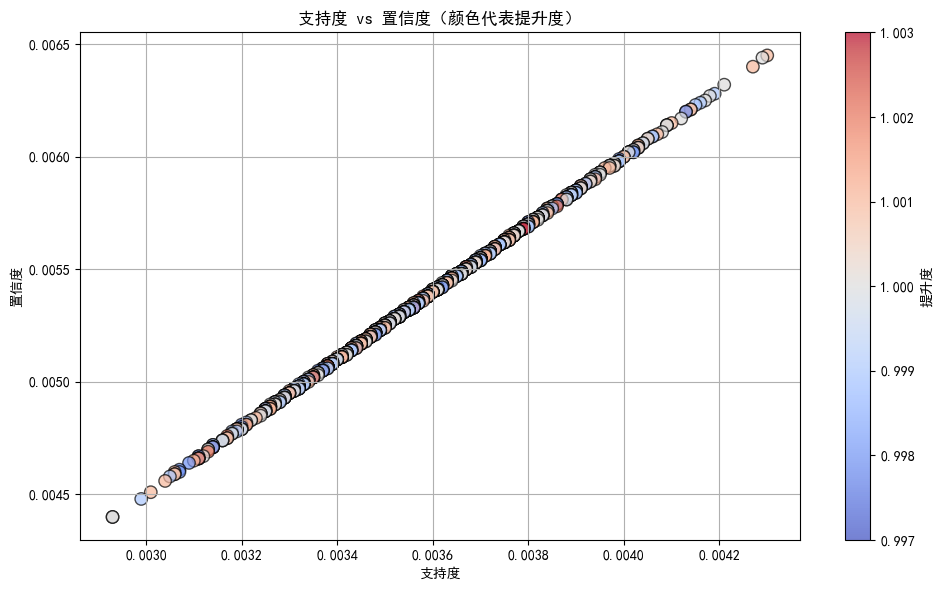

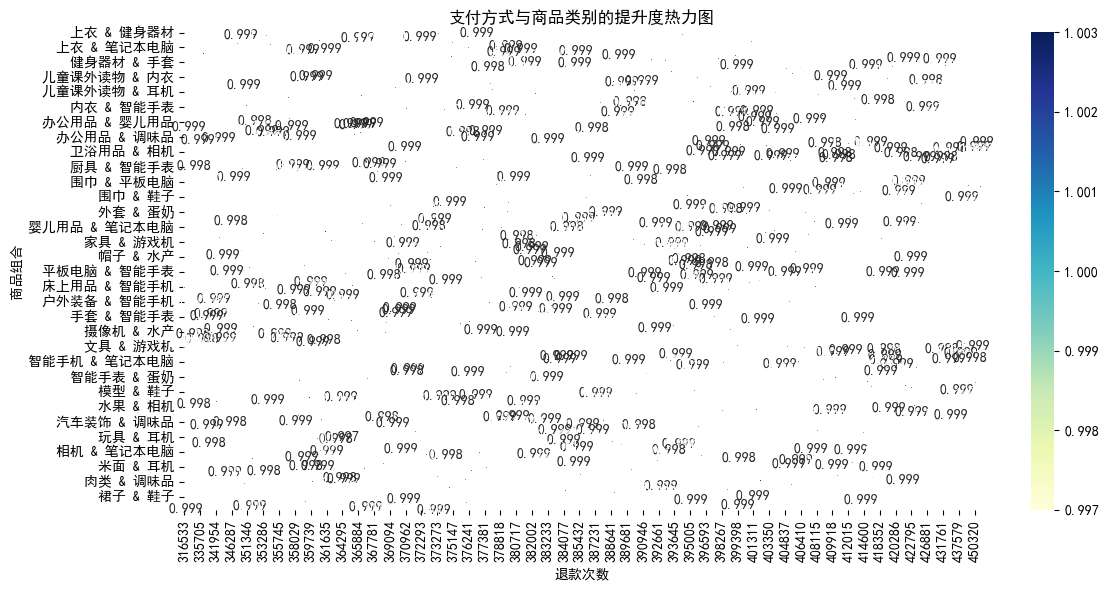

C:\Users\Highee\AppData\Local\Temp\ipykernel_9492\1093149081.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_lift.index, y=avg_lift.values, palette="viridis")


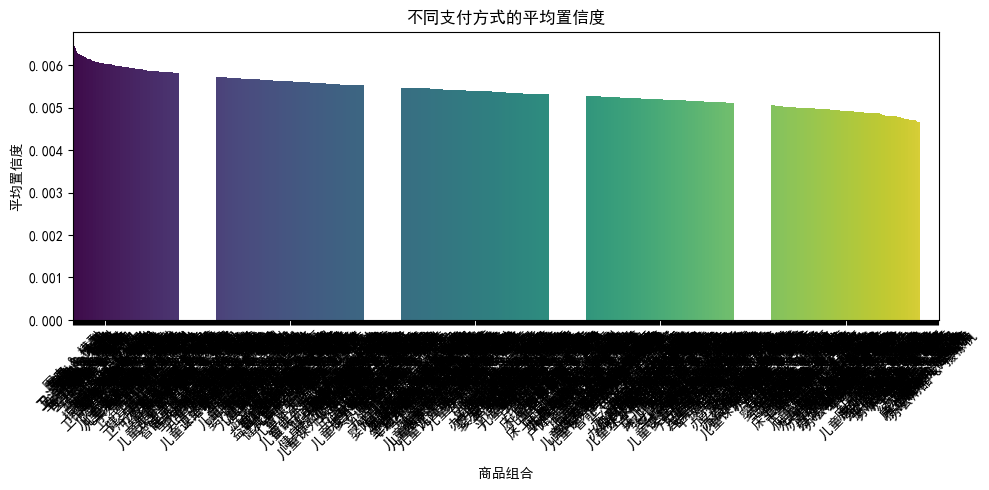

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取 CSV 文件
save_path = "退款商品组合_关联规则.csv"
df = pd.read_csv(save_path)

# 设置中文字体（防止中文乱码）
plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
plt.rcParams['axes.unicode_minus'] = False

# 基础信息
print("数据集预览：")
print(df.head())

# 1. 散点图：支持度 vs 置信度，点的颜色代表提升度
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df["支持度"], df["置信度"], 
    c=df["提升度"], cmap="coolwarm", s=80, alpha=0.7, edgecolors='k'
)
plt.colorbar(scatter, label="提升度")
plt.xlabel("支持度")
plt.ylabel("置信度")
plt.title("支持度 vs 置信度（颜色代表提升度）")
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. 热力图：透视表（支付方式 x 商品类别） -> 提升度
pivot = df.pivot_table(index="商品组合", columns="退款次数", values="提升度", aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt=".3f")
plt.title("支付方式与商品类别的提升度热力图")
plt.tight_layout()
plt.show()

# 3. 条形图：不同支付方式的平均置信度
avg_lift = df.groupby("商品组合")["置信度"].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_lift.index, y=avg_lift.values, palette="viridis")
plt.ylabel("平均置信度")
plt.title("不同支付方式的平均置信度")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
